# 2 Perceptron vs Neural Networks
**Background.** In this part, you will be working on a binary classification task on a given synthetic
dataset. You will use machine learning tools including a Perceptron and a 3-layer Neural Network
to solve the task. Here, we are looking for your meaningful observations and discussions towards
the differences between Perceptron and Neural Networks.

Question 2 [Neural Network’s Decision Boundary, 2+7+10+6=25 Marks]


I. Load Task2B train.csv and Task2B test.csv datasets, plot the training and testing data separately in two plots. Mark the data with different labels in different colors.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  scipy.stats import multivariate_normal
from zipfile import ZipFile
from sklearn.preprocessing import normalize
import re
import pandas as pd
import os

In [4]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
dir = '/content/drive/MyDrive/FIT5201/Assignment2'
text_path = os.path.join(dir, 'Task2B_train.csv')
train2b=pd.read_csv(text_path)
text_path = os.path.join(dir, 'Task2B_test.csv')
test2b=pd.read_csv(text_path)

Here we will seperate the train test data based on label. This will allow us to properly understand availability of how these labels are in the dataset

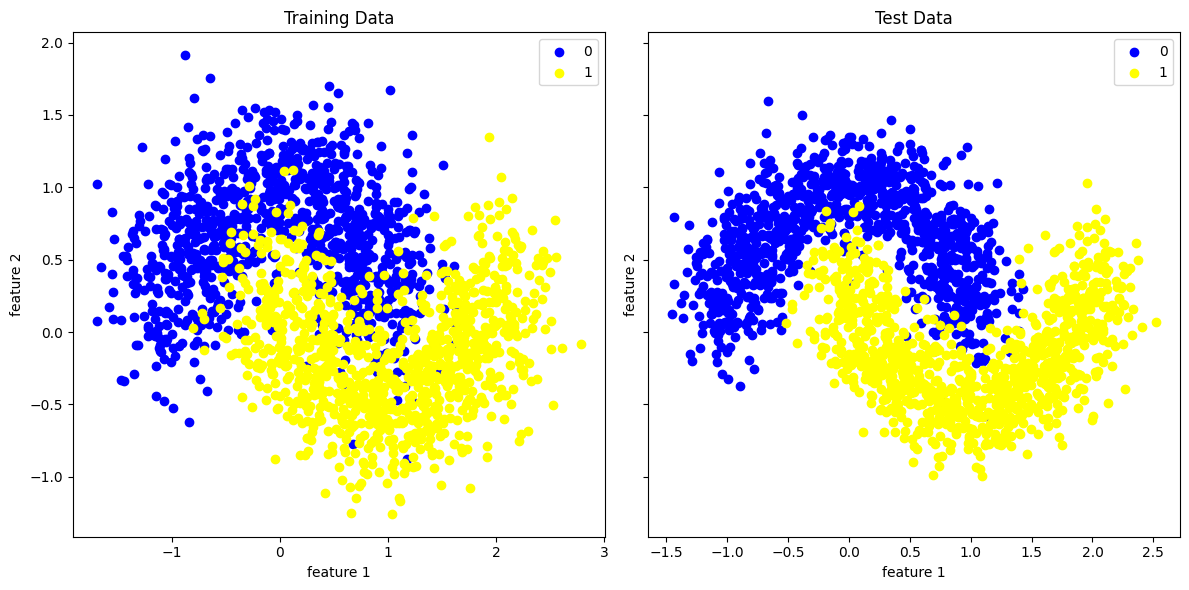

In [6]:
from matplotlib import pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True, sharey=True)

# We plot the train data
axs[0].scatter(train2b.loc[train2b['label'] == 0, 'feature1'], train2b.loc[train2b['label'] == 0, 'feature2'], c='blue', label="0")
axs[0].scatter(train2b.loc[train2b['label'] == 1, 'feature1'], train2b.loc[train2b['label'] == 1, 'feature2'], c='yellow', label="1")
axs[0].legend()
axs[0].set_xlabel('feature 1')
axs[0].set_ylabel('feature 2')
axs[0].set_title('Training Data')

# We plot the test data
axs[1].scatter(test2b.loc[test2b['label'] == 0, 'feature1'], test2b.loc[test2b['label'] == 0, 'feature2'], c='blue', label="0")
axs[1].scatter(test2b.loc[test2b['label'] == 1, 'feature1'], test2b.loc[test2b['label'] == 1, 'feature2'], c='yellow', label="1")
axs[1].legend()
axs[1].set_xlabel('feature 1')
axs[1].set_ylabel('feature 2')
axs[1].set_title('Test Data')

plt.show()


From the plot above we can see that Training data is more mixed and has data spreadout while test data has some data that overlaps different label. Both these datasets have a similar boundary shape.

II Train two Perceptron models on the loaded training data by setting the learning rates η to
0.1 and 1.0 respectively. Calculate the test errors of two models and find the best η and its
corresponding model, then plot the decision boundary and the test data in one plot. Hint:
We expect the decision boundary of your perceptron to be a linear function that separates
the testing data into two parts. You may also choose to change the labels from [0, 1] to [-1,
+1] for your convenience.


Here we seperate the feature and label from Train and Test Data

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [8]:
X_train = train2b[['feature1', 'feature2']]
y_train=  train2b['label']
X_test = test2b[['feature1', 'feature2']]
y_test=  test2b['label']

We will load two Perceptron models on the train data for each learning rate.

In [38]:
etas = [0.1,1.0]
perceptron_error_list = []
for eta in etas:
    model = Perceptron(eta0=eta, random_state=15).fit(X_train, y_train)
    # Predict using the fit model
    y_pred = model.predict(X_test)
    # Calculate Test error
    perceptron_error = np.mean(y_pred != y_test)
    # Add to error list
    perceptron_error_list.append(perceptron_error)

    print(f'test error: {perceptron_error} learning rate: {eta}' )

besteta=etas[np.argmin(perceptron_error_list)]
print(f'Best eta : {besteta}')


test error: 0.2015 learning rate: 0.1
test error: 0.337 learning rate: 1.0
Best eta : 0.1


Here the Perceptron model with lowest test error has been chosen as the best model

In [39]:
besteta_perceptron = Perceptron(eta0=0.1,random_state=15).fit(X_train, y_train)
# Get weights from perceptron based on model with high accuracy
weight1, weight2 = besteta_perceptron.coef_[0]
weight0 = besteta_perceptron.intercept_

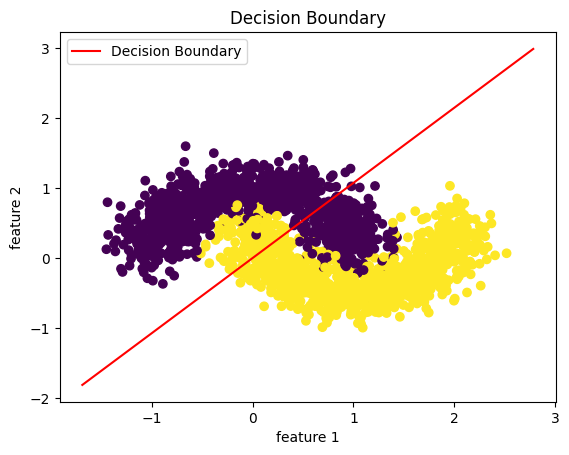

In [83]:
xtrain_min = X_train['feature1'].min()
xtrain_max = X_train['feature1'].max()
# We create a range of input values to plot
x1 = np.linspace(xtrain_min,xtrain_max)
#x1 = np.arange(xtrain_min, xtrain_max, 0.5)
# Set the boundary decision to separate test data
#Here data points are seperated based on if x2 is greater than or equal to 0 or
#less than 0
x2 = -(weight1 / weight2) * x1 -weight0
# Plot the decision boundary line
plt.plot(x1, x2, color='red', label='Decision Boundary')
xtest_f1 = X_test['feature1']
xtest_f2 = X_test['feature2']
plt.scatter(xtest_f1, xtest_f2, c=y_test)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()


III For each combination of K (i.e, number of units in the hidden layer) in 5, 10, 15, ..., 40, (i.e.
from 5 to 40 with a step size of 5), and η (i.e., learning rate) in 0.01, 0.001 run the 3-layer
Neural Network and record testing error for each of them. Plot the effect of different K values
on the accuracy of the testing data. Based on this plot, find the best combination of K and η
and obtain your best model, then plot the decision boundary and the test data in one plot.


Here we plot 3 layer neural network for each combination of K and eta(learning rate) using MLPClassifier which is a multi layer perceptron.

In [43]:
from sklearn.neural_network import MLPClassifier
eta = [0.01,0.001]
accuracy=[]
test_errors = []

for k in range(5, 45, 5):
    for e in eta:
        model = MLPClassifier(hidden_layer_sizes=(k,), learning_rate_init = e, max_iter=10000, random_state = 15)
        model.fit(X_train, y_train)
        # Predict using the fit model
        y_pred = model.predict(X_test)
        # Obtain prediction count
        MLP_predictions = np.count_nonzero(y_pred == y_test)
        MLP_error = np.mean(y_pred != y_test)
        # Calculating the accuracy and the error of testing data
        classification_accuracy = MLP_predictions / len(y_test)
        accuracy.append([classification_accuracy, e, k])
        test_errors.append([MLP_error, e, k])
        print(f'Neural Network Model k: {k} eta: {e} accuracy: {classification_accuracy} test error: {MLP_error}')

print("\n")
best_model_info = min(test_errors, key=lambda x: x[0])
print(f'Neural Network Model lowest test error K: {best_model_info[2]} eta: {best_model_info[1]} test error: {best_model_info[0]}')

Neural Network Model k: 5 eta: 0.01 accuracy: 0.883 test error: 0.117
Neural Network Model k: 5 eta: 0.001 accuracy: 0.8825 test error: 0.1175
Neural Network Model k: 10 eta: 0.01 accuracy: 0.8825 test error: 0.1175
Neural Network Model k: 10 eta: 0.001 accuracy: 0.9535 test error: 0.0465
Neural Network Model k: 15 eta: 0.01 accuracy: 0.966 test error: 0.034
Neural Network Model k: 15 eta: 0.001 accuracy: 0.9615 test error: 0.0385
Neural Network Model k: 20 eta: 0.01 accuracy: 0.9675 test error: 0.0325
Neural Network Model k: 20 eta: 0.001 accuracy: 0.959 test error: 0.041
Neural Network Model k: 25 eta: 0.01 accuracy: 0.9665 test error: 0.0335
Neural Network Model k: 25 eta: 0.001 accuracy: 0.963 test error: 0.037
Neural Network Model k: 30 eta: 0.01 accuracy: 0.967 test error: 0.033
Neural Network Model k: 30 eta: 0.001 accuracy: 0.9615 test error: 0.0385
Neural Network Model k: 35 eta: 0.01 accuracy: 0.969 test error: 0.031
Neural Network Model k: 35 eta: 0.001 accuracy: 0.961 test 

Here we seperate the accuracy to plot each eta

In [50]:
accuracy_eta_001=[]
accuracy_eta_0001=[]
for i in range(len(accuracy)):
    eta=accuracy[i][1]
    accuracyeta=accuracy[i][0]
    k=accuracy[i][2]
    if eta == 0.01:
                accuracy_eta_001.append([accuracyeta, k])
    elif eta == 0.001:
                accuracy_eta_0001.append([accuracyeta, k])

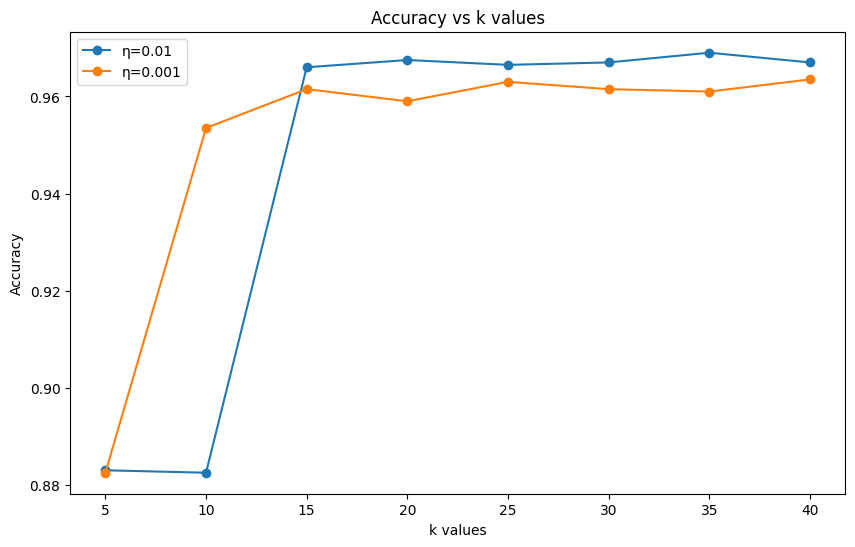

In [56]:
accuracy_eta_001 = np.array(accuracy_eta_001)
accuracy_eta_0001 = np.array(accuracy_eta_0001)
plt.figure(figsize=(10, 6))
plt.plot(accuracy_eta_001[:, 1], accuracy_eta_001[:, 0], label='η=0.01', marker='o', linestyle='-')
plt.plot(accuracy_eta_0001[:, 1], accuracy_eta_0001[:, 0], label='η=0.001', marker='o', linestyle='-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k values')
plt.legend()
plt.show()

Based on accuracy we can conclude that k=35 with eta value of 0.01 is our best model. This is in line with the calculation of test error done earlier.From the lot we can clearly see clear increase in accuracy from 5 to 10. There is fluctuation after that but at some k the accuracy increases more than others.

In [57]:
# Create the best model
best_model = MLPClassifier(hidden_layer_sizes=(35,), learning_rate_init=0.01, max_iter=10000, random_state=15)
best_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(35,), learning_rate_init=0.01, max_iter=10000,
              random_state=15)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


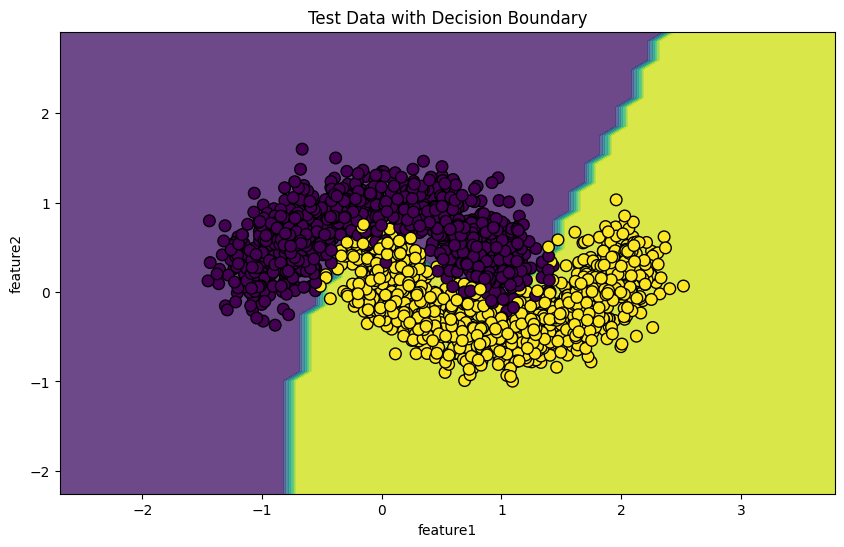

In [79]:
plt.figure(figsize=(10, 6))
#We set X,Y range
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
#Use meshgrid  to create spanning grid for x,y coordinates
x,y = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
#Using best mdel to predict and flatter
y_pred = best_model.predict(np.c_[x.ravel(), y.ravel()])

#Reshape into 2d array
Y_pred = y_pred.reshape(x.shape)
#Plot Decision boundary
plt.contourf(x, y, Y_pred, alpha=0.8)
#Plot Test data
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1],
            c=y_test, edgecolors='k', s=70)
plt.title('Test Data with Decision Boundary')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

Explain the reason(s) responsible for such difference between Perceptron and a 3-layer Neural
Network by comparing the plots you generated in Steps II and III. Hint: Look at the plots
and think about the model assumptions.

Perceptron is single layer while MLP is a 3 layer Neural Network with input hiddem and output layer. These multilayers allow 3 layer NN to capture complex relationships

Perceptron using linear activation function while MLP uses non linear activation function. In our case

Due to simple Perceptron model it tends to not overfit but again fails to capture complex relationships. On the other hand MLP can capture complex relationship but has the possibility of overfitting

We can clearly see the MLP curving with data points while the decision boundaryy line for perceptron is straight line